# Introdução

Um dos temas principais de problemas numéricos é a obtenção de funções, ou leis, que ajustem dados experimentais. Por exemplo, imagine que temos dados experimentais de um fenômeno que pode ser explicado por um polinômio do segundo grau. Mesmo que o fenômeno seja perfeitamente explicável por esse tipo de função os erros de medidas nunca vão nos permitir observar exatamente o gráfico da verdadeira função. Vamos simular isso no código abaixo.

In [ ]:
using PyPlot

# Uma função do segundo grau.
lei(x) = π*x.^2 + 2.0.*x + 1.73

# Vamos simular medidas reais de valores da função introduzindo um erro aleatório
# em [-5, 5].
n_pontos = 500
x = linspace(-4, 4, n_pontos)
medida = lei(x) + 10*(rand(n_pontos) - 0.5)
scatter(x, medida)

Ao observar a figura acima podemos ter a intruição que o valor medido vem de fato de um polinômio do segundo grau. Mas como descobrir qual é esse polinômio. Ou seja, como recuperar os coeficientes $a_2 = \pi,\ a_1 = 2, a_0 =1.73$? Este é o assunto dessa parte do curso.

# Modelando o problema de ajuste polinômios de grau 2

Vamos tentar achar uma formulação matemática razoável para o problema e depois resolvê-lo. O que temos são medidas com erros de função $p$ cujo o formato geral conhecemos
$$
p(x) = a_2 x^2 + a_1 x + a_0,
$$
para coeficientes $a_2,\ a_1,\ a_0$ que não conhecemos. Desejamos descobrir os valores dos seus coeficientes $a_2,\ a_1$ e $a_0$. A informação que temos disponível são medidas $(x_i, y_i),\ i = 1, \ldots, m$ e que $y_i = p(x_i)$ mais algum tipo de ruído aleatório. Note que se não houvesse o ruído aleatório, isso é se tivéssemos o valor exato do polinômio desejado a solução seria simples. Bastaria pegar três pontos do plano e encontrar o (único) polinômio do segundo grau que passa por eles. Veremos como fazer esse isso na próxima parte do curso. Note que quaisquer que fosse os três pontos escolhidos iríamos obter o mesmo polinômio.

No caso de erros de medidas na função fica impossível usar a ideia acima já que o polinômio iria mudar um pouco dependendo de quais três pontos fossem escolhidos. Nesse caso, uma ideia razoável nesse caso é procurar qual o polinômio do segundo grau que melhor se "encaixa" a todos os dados ao mesmo tempo. Como fazer isso matematicamente? 

Dado um $i = 1, \ldots, m$, o erro de uma função $p$ com respeito ao valor medido em um único ponto $x_i$ é 
$$
| p(x_i) - y_i |.
$$
Para levar em consideração todos os pontos, os erros em todos eles devem ser combinados de alguma forma. Uma maneira natural é pensar em dois vetores do $\mathbb{R}^m$. O primeiro representa os valores medidos $y = (y_1, y_2, \ldots, y_m)$ e o segundo a função $p$ nos respectivos pontos $p = (p(x_1), p(x_2), \ldots, p(x_m))$. O que gostaríamos é que $y = p$ mas devido aos erros isso é impossível. Podemos então buscar os coeficientes $a_2$, $a_1$ e $a_0$ que minimizem a distância entre $y$ e $p$, já que isso leva em conta todas as coordenadas. Ou seja queremos encontrar os coeficientes para os quais
$$
\| p - y \|_2
$$
é o menor possível. Uma coisa interessante é que minimizar a norma euclidiana ou o seu quadrado dá a mesma resposta. Já a norma euclidiana ao quadrado tem a vantagem de ser diferenciável o que poderemos explorar ao resolver o problema.

Chegamos finalmente ao seguinte problema:

*Encontre coeficientes $a_2,\ a_1,\ a_0$ de modo que ao definirmos a função $p(x) = a_2 x^2 + a_1 x + a_0$ o valor de*
\begin{equation}
\sum_{i = 1}^m (p(x_i) - y_i)^2 = \| p - y \|^2
\end{equation}
*seja o menor possível.*

# Ajuste linear de curvas

Uma observação importante é que o fato da função que desejamos ajustar aos dados medidos ser um polinômio de grau 2 desempenhou um papel secundário na dedução do problema final acima. A mesma ideia poderia ser aplicada para ajustar um polinômio de grau 5, por exemplo. Mais ainda se função que desejamos ajustar é uma soma de senos e cossemos como
$$
c_0 \sin(x) + c_1 \cos(x) + c_2 \sin(2x) + c_3 \cos(2x)
$$
o mesmo problema faz sentido e a modelagem é basicamente a mesma. 

De uma maneira geral, considere que temos $n$ funções $\phi_1,\ \phi_2, \ldots, \phi_n$ que acreditamos que se se combinam de forma linear para definir uma função $\phi$. Isto é, acreditamos que $\phi$ tem a forma
$$
\phi(x) = c_1 \phi_1(x) + c_2 \phi_2(x) + \ldots + c_n \phi_n(x)
$$
usando um vetor de coeficientes $c = (c_1, c_2, \ldots, c_n) \in \mathbb{R}^n$. Considere também que temos um conjunto de medidas $(x_i, y_i),\ i = 1, \ldots, m$ que representam, aproximadamente, avaliações da função $\phi$ com o formato acima.

Podemos então desejar encontrar os coeficientes que definem a função $\phi$ que melhor se ajusta aos dados no sentido de minimizar
$$
\| \phi - y \|^2,
$$
em que $y$ é o vetor de medidas $y = (y_1, y_2, \ldots, y_m)$ e $\phi$ o vetor da função $\phi(\cdot)$ avaliado nos pontos $x_i,\ i = 1, 2, \ldots, m$:
$$
\phi = 
\left(
\begin{array}{c}
\phi(x_1) \\
\phi(x_2) \\
\vdots \\
\phi(x_m)
\end{array}
\right) = 
\left(
\begin{array}{c}
c_1 \phi_1(x_1) + c_2 \phi_2(x_1) + \ldots + c_n \phi_n(x_1) \\
c_1 \phi_1(x_2) + c_2 \phi_2(x_2) + \ldots + c_n \phi_n(x_2) \\
\vdots \\
c_1 \phi_1(x_m) + c_2 \phi_2(x_m) + \ldots + c_n \phi_n(x_m) \\
\end{array}
\right). 
$$
Escolhemos o critério de minimizar a norma euclidiana *elevada ao quadrado* por que assim a função que desejamos minimizar é diferenciável.

Obtemos assim o problema de encontrar um vetor de coeficientes $c = (c_1, c_2, \ldots, c_n)$ tal que ao definirmos a função $\phi(x) = c_1 \phi_1(x) + c_2 \phi_2(x) + \ldots + c_n \phi_n(x)$ o valor de
\begin{equation}
\sum_{i = 1}^m (\phi(x_i) - y_i)^2 = \| \phi - y \|^2
\end{equation}
seja o menor possível.

Para sermos capaz de realizar essa tarefa temos que entender como a expressão acima varia com os coeficientes no vetor $c$. Para isso vamos usar um pouco de notação matricial. Se olharmos a segunda fórmula acima e tentarmos entender o que ela diz colocando $c$ em destaque temos:
\begin{equation}
\phi = \underbrace{\left(
\begin{array}{c}
\phi(x_1) \\
\phi(x_2) \\
\vdots \\
\phi(x_m)
\end{array}
\right)}_{\phi}
= \underbrace{\left( \begin{array}{cccc}
\phi_1(x_1) & \phi_2(x_1) & \ldots & \phi_n(x_1) \\
\phi_1(x_2) & \phi_2(x_2) & \ldots & \phi_n(x_2) \\
\vdots & \vdots & \vdots & \vdots \\
\phi_1(x_m) & \phi_2(x_m) & \ldots & \phi_n(x_m) \\
\end{array}
\right)}_{\Phi} 
\underbrace{\left( \begin{array}{c}
c_1  \\
c_2 \\
\vdots \\
c_n
\end{array} \right)}_{c}.
\end{equation}
Como sugerido acima, podemos definir a matriz $\Phi$ como a matriz acima, ou seja a matriz que contém na primeira coluna a função $\phi_1$ avaliada nos pontos $x_1, x_2, \ldots, x_m$, depois na segunda coluna a função $\phi_2$ avaliada nos mesmos pontos e assim sucessivamente. Com isso podemos escrever essa última expressão na forma compacta
$$
\phi = \Phi c.
$$
Assim, a função que queremos minimizar pode ser escrita tornando explícita sua dependência no vertor de coeficientes como
$$
f(c) = \| \Phi c - y \|^2 = (\Phi c - y)^t(\Phi c - y) = c^t \Phi^t \Phi c - 2 c^t\Phi^t y - y^t y.
$$

Como desejamos minimizar a função $f: \mathbb{R}^n \rightarrow \mathbb{R}$ podemos usar os nossos conhecimentos de cálculo. Em primeiro lugar, observe que a função cresce de forma quadrática com $c$, logo para $c$ grande ela passará a crescer até infinito se a norma de $c$ crescer indefinidamente. Logo ela atinge mínimo. Agora, sabemos de cálculo que os candidatos a ponto de mínimo devem obedecer à esquação
$$
\nabla f(c) = 0.
$$
Precismos descobrir como calcular a derivada de $f$. Para isso observe as seguintes regras de derivação que são facilmente demonstradas a partir das respectivas fórmulas.

1. Se $g(c) = c^tAc$, para alguma matriz quadrada $A$, então $\nabla g(c) = 2 A c$.
1. Se $h(c) = c^t b = b^t c$, para algum vetor $b$, então $\nabla h(c) = b$, um vetor constante.

## Equações normais

Aplicando as regras de cálculo acima para obter o gradiente de $f$:
$$
\nabla f(c) = 2 \Phi^t \Phi c - 2 \Phi^t y.
$$
Assim a equação que caracteriza o mínimo é
$$
0 = \nabla f(c) = 2 \Phi^t \Phi c - 2 \Phi^t y.
$$
Ou escrevendo de uma forma mais simples, eliminando a constante 2,
$$
\Phi^t \Phi c = \Phi^t y.
$$
Um sistema de equações lineares em $c$ com $n$ equações e $n$ incógnitas que aprendemos a resolver anteriormente. Esse tipo de sistema é conhecido como *equação normal* associada ao problema de quadrados mínimos. Em particular se a matriz do sistema $\Phi^t \Phi$ for inversível sabemos que haverá uma única solução que será necessariamente então o mínimo da função $f$.  

Nos problemas que vamos enfrentar é natural imaginar que a matriz $\Phi^t \Phi$ é inversível. Isso somente não ocorrerá se uma das funções $\phi_1, \phi_2, \ldots, \phi_m$ for redundante (poder ser vista como uma combinação linear das outras, pelo menos nos pontos $x_1, x_2, \ldots, x_n$.). Para ver isso é necessário usar um pouco de álgebra linear, fugindo um pouco do escopo de curso introdutório.

Estamos prontos para resolver o problema do início da discussão e usar o vetor `medida` para tentar recuperar a função `lei`. Vamos começar criando a matriz $\Phi$.

In [ ]:
# Constroi uma matriz concatenando uma coluna de 1's de dimensão adequada, o vetor x e depois o vetor x^2.
Φ = [ones(n_pontos) x x.^2];

In [13]:
# Resolve a equação normal Φ'Φ c = Φ' medida, usando o operador \ de Julia
c = (Φ'*Φ) \ (Φ'*medida)

3-element Array{Float64,1}:
 1.71444
 1.97455
 3.13709

Veja como os valores se aproximam dos valores originais que eram 1.73 para o termos constante, $2$ para o coeficiente de $x$ e $\pi$ para o coeficiente associado a $x^2$. Outra coisa interessante de fazer é mostrar o gráfico da função final obtida e mostrar como ele se ajusta bem nos pontos medidos.

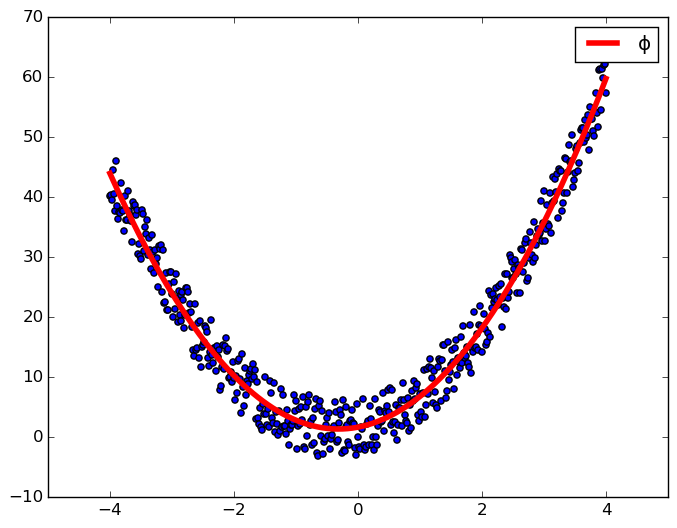

PyObject <matplotlib.legend.Legend object at 0x7f87ba988650>

In [27]:
# Define a função ϕ a partir dos coeficientes calculados e das funções originais 1, x, e x^2.
phi(x) = c[1].*1  + c[2].*x +  c[3].*x.^2

# Plota os pontos medidos e o gráfico da função obtida.
scatter(x, medida)
plot(x, phi(x), linewidth=4, color="r", label="ϕ")
legend()
